1. "tidyverse", "data.table" 패키지를 부착하고 출력 그래프의 크기를 원하는 크기로 알맞게 설
정하세요.

In [1]:
install.packages(c("tidyverse", "data.table"))

library(tidyverse)
library(data.table)

library(repr)
options(repr.plot.width = 10, repr.plot.height = 7)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#https://drive.google.com/file/d/14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l/view?usp=share_link

system("gdown --id 14TGnFaPQZdifHG9migc4iCFHPD3Gqi3l")
system("ls", TRUE)

[1] "sample_data"       "titanic_train.csv"

2. https://www.kaggle.com/c/titanic/data 제시된 titanic_train.csv 파일을 다운로드 받아 자신의
코랩에 저장한 후 DF에 tibble 형태로 읽어 들여 확인하세요. (Hint) system(), fread()

In [3]:
DF <- fread("/content/titanic_train.csv", header = T, encoding = "UTF-8") %>% as_tibble()
DF %>% show()

# A tibble: 891 × 12
   PassengerId Survived Pclass Name   Sex     Age SibSp Parch Ticket  Fare Cabin
         <int>    <int>  <int> <chr>  <chr> <dbl> <int> <int> <chr>  <dbl> <chr>
 1           1        0      3 Braun… male     22     1     0 A/5 2…  7.25 ""   
 2           2        1      1 Cumin… fema…    38     1     0 PC 17… 71.3  "C85"
 3           3        1      3 Heikk… fema…    26     0     0 STON/…  7.92 ""   
 4           4        1      1 Futre… fema…    35     1     0 113803 53.1  "C12…
 5           5        0      3 Allen… male     35     0     0 373450  8.05 ""   
 6           6        0      3 Moran… male     NA     0     0 330877  8.46 ""   
 7           7        0      1 McCar… male     54     0     0 17463  51.9  "E46"
 8           8        0      3 Palss… male      2     3     1 349909 21.1  ""   
 9           9        1      3 Johns… fema…    27     0     2 347742 11.1  ""   
10          10        1      2 Nasse… fema…    14     1     0 237736 30.1  ""   
# ℹ 881

3. 위 문제의 변수설명을 참고로 DF에서 팩터 형태로 저장되어야 하는 데이터들을 팩터로 변경
하고 분석에 영향을 미치지 않는 변수들은 제외하여 DF에 저장하세요. (Hint) 팩터
("Survived", "Pclass", "Sex", "Embarked"), 분석에 영향을 미치지 않으므로 제외
(-PassengerId, -Name, -Cabin, -Ticket)

In [4]:
DF <- select(DF, -PassengerId, -Name, -Cabin, -Ticket) %>%
  mutate_at(c("Survived", "Pclass", "Sex", "Embarked"), factor)

4. DF %>% summary() 정보를 확인하면 모든 NA는 Age에서 발견됩니다. titanic 사고 시 사망
자의 나이를 특정할 수 없을 수도 있을 것이라는 생각이 듭니다. NA를 어떻게 처리할지는 분
석자의 몫입니다. 이번 분석에서는 NA를 중간값으로 변경하세요. (Hint) Hmisc::impute()

In [5]:
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex      Age SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <dbl> <int> <int> <dbl> <fct>   
 1 0        3      male      22     1     0  7.25 S       
 2 1        1      female    38     1     0 71.3  C       
 3 1        3      female    26     0     0  7.92 S       
 4 1        1      female    35     1     0 53.1  S       
 5 0        3      male      35     0     0  8.05 S       
 6 0        3      male      NA     0     0  8.46 Q       
 7 0        1      male      54     0     0 51.9  S       
 8 0        3      male       2     3     1 21.1  S       
 9 1        3      female    27     0     2 11.1  S       
10 1        2      female    14     1     0 30.1  C       
# ℹ 881 more rows


In [6]:
DF %>% str()

tibble [891 × 8] (S3: tbl_df/tbl/data.frame)
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp   : int [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked: Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [7]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [8]:
summary(DF)

 Survived Pclass      Sex           Age            SibSp           Parch       
 0:549    1:216   female:314   Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 1:342    2:184   male  :577   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
          3:491                Median :28.00   Median :0.000   Median :0.0000  
                               Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                               3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                               Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                               NA's   :177                                     
      Fare        Embarked
 Min.   :  0.00    :  2   
 1st Qu.:  7.91   C:168   
 Median : 14.45   Q: 77   
 Mean   : 32.20   S:644   
 3rd Qu.: 31.00           
 Max.   :512.33           
                          

In [9]:
#DF <- DF %>% na.omit()
DF$Age <- impute(DF$Age, median)
DF %>% show()

# A tibble: 891 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 881 more rows


5. DF 데이터의 90%를 학습 데이터(train)로, 나머지는 테스트 데이터(test)로 분리하세요. (Hint) caret::createDataPartition() 또는 sample_frac(), setdiff()

In [10]:
install.packages("caret")
library(caret)
set.seed(31)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [11]:
index <- caret::createDataPartition(y = DF$Survived, p = 0.9, list = FALSE)
train <- DF[index, ]
test <- DF[-index, ]

train %>% show()
test %>% show()

train %>% show()
test %>% show()

# A tibble: 803 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 0        3      male   22           1     0  7.25 S       
 2 1        1      female 38           1     0 71.3  C       
 3 1        3      female 26           0     0  7.92 S       
 4 1        1      female 35           1     0 53.1  S       
 5 0        3      male   35           0     0  8.05 S       
 6 0        3      male   28           0     0  8.46 Q       
 7 0        1      male   54           0     0 51.9  S       
 8 0        3      male    2           3     1 21.1  S       
 9 1        3      female 27           0     2 11.1  S       
10 1        2      female 14           1     0 30.1  C       
# ℹ 793 more rows
# A tibble: 88 × 8
   Survived Pclass Sex    Age      SibSp Parch  Fare Embarked
   <fct>    <fct>  <fct>  <impute> <int> <int> <dbl> <fct>   
 1 1        2      male   34.0         0     0 13    S       
 2 0        3

6. train 데이터와 ipred::bagging()을 이용하여 bagging 모델 model_bagging을 생성하고 확인하세요.

In [14]:
#이거 잘못 인스톨한거임
install.packages("adabag")
library(adabag)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
install.packages("ipred")
library(ipred)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ipred’


The following object is masked from ‘package:adabag’:

    bagging




In [18]:
set.seed(66)
model_begging <- ipred::bagging(Survived~., data = train, nbagg = 100)

In [20]:
summary(model_begging)


Bagging classification trees with 100 bootstrap replications 

Call: bagging.data.frame(formula = Survived ~ ., data = train, nbagg = 100)




$y
  [1] 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 [38] 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0
 [75] 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
[112] 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
[149] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0
[186] 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
[223] 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0
[260] 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0
[297] 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1
[334] 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
[371] 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0
[408] 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
[445] 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1

7. 모델 model_bagging을 사용하여 test 데이터로 예측을 수행한 후 예측값을
predict_value_bagging에 저장하고 확인하세요. (Hint) predict()

In [27]:
predict_value_bagging <- predict(model_begging, test, type = "class") %>% tibble(predict_value_bagging = .)
head(predict_value_bagging)

predict_value_bagging
<fct>
0
0
0
0
0
0


In [28]:
summary(predict_value_bagging)

 predict_value_bagging
 0:60                 
 1:28                 

8. 위 문제에서 구한 predict_value_bagging과 test 데이터의 Survived 데이터를 묶어
predict_check_bagging에 저장하고 확인하세요. (Hint) select(), bind_cols()

In [31]:
predict_check_bagging <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value_bagging)
head(predict_check_bagging)

Survived,predict_value_bagging
<fct>,<fct>
1,0
0,0
0,0
0,0
1,0
0,0


9. test 데이터로 예측을 수행하여 예측값을 저장한 predict_value_bagging과 test$Survived 사이
의 confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요. (Hint)
caret::confusionMatrix()

In [32]:
cm <- caret::confusionMatrix(predict_value_bagging$predict_value_bagging, test$Survived)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 48 12
         1  6 22
                                         
               Accuracy : 0.7955         
                 95% CI : (0.6961, 0.874)
    No Information Rate : 0.6136         
    P-Value [Acc > NIR] : 0.0002067      
                                         
                  Kappa : 0.5541         
                                         
 Mcnemar's Test P-Value : 0.2385928      
                                         
            Sensitivity : 0.8889         
            Specificity : 0.6471         
         Pos Pred Value : 0.8000         
         Neg Pred Value : 0.7857         
             Prevalence : 0.6136         
         Detection Rate : 0.5455         
   Detection Prevalence : 0.6818         
      Balanced Accuracy : 0.7680         
                                         
       'Positive' Class : 0              
                                         

10. train 데이터와 randomForest()을 이용하여 Random Forests 모델 model_fr을 생성하고 확인
하세요.

In [36]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [41]:
model_rf <- randomForest(Survived ~ . , data = train, na.action = na.omit, ntree= 1000)
model_rf


Call:
 randomForest(formula = Survived ~ ., data = train, ntree = 1000,      na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 15.94%
Confusion matrix:
    0   1 class.error
0 457  38  0.07676768
1  90 218  0.29220779

11. 모델 model_rf을 사용하여 test 데이터로 예측을 수행한 후 예측값을 predict_value_rf에 저
장하고 확인하세요. (Hint) predict()

In [42]:
predict_value_rf <- predict(model_rf, test, type = "class") %>% tibble(predict_value_rf = .)
head(predict_value_rf)

predict_value_rf
<fct>
0
0
0
0
0
0


12. 위 문제에서 구한 predict_value_rf와 test 데이터의 Survived 데이터를 묶어
predict_check_rf에 저장하고 확인하세요. (Hint) select(), bind_cols()

In [43]:
predict_check_rf <- test %>% select(Survived) %>% dplyr::bind_cols(., predict_value_rf)
head(predict_check_rf)

Survived,predict_value_rf
<fct>,<fct>
1,0
0,0
0,0
0,0
1,0
0,0


13. test 데이터로 예측을 수행하여 예측값을 저장한 predict_value_rf과 test$Survived 사이의
confusionMatrix를 생성한 후 정확도 및 성능지표를 확인하세요. (Hint)
caret::confusionMatrix()

In [44]:
cm <- caret::confusionMatrix(predict_value_rf$predict_value_rf, test$Survived)
cm

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 50 14
         1  4 20
                                         
               Accuracy : 0.7955         
                 95% CI : (0.6961, 0.874)
    No Information Rate : 0.6136         
    P-Value [Acc > NIR] : 0.0002067      
                                         
                  Kappa : 0.5438         
                                         
 Mcnemar's Test P-Value : 0.0338949      
                                         
            Sensitivity : 0.9259         
            Specificity : 0.5882         
         Pos Pred Value : 0.7812         
         Neg Pred Value : 0.8333         
             Prevalence : 0.6136         
         Detection Rate : 0.5682         
   Detection Prevalence : 0.7273         
      Balanced Accuracy : 0.7571         
                                         
       'Positive' Class : 0              
                                         

14. model_rf의 변수 중요도를 그림으로 나타내세요.

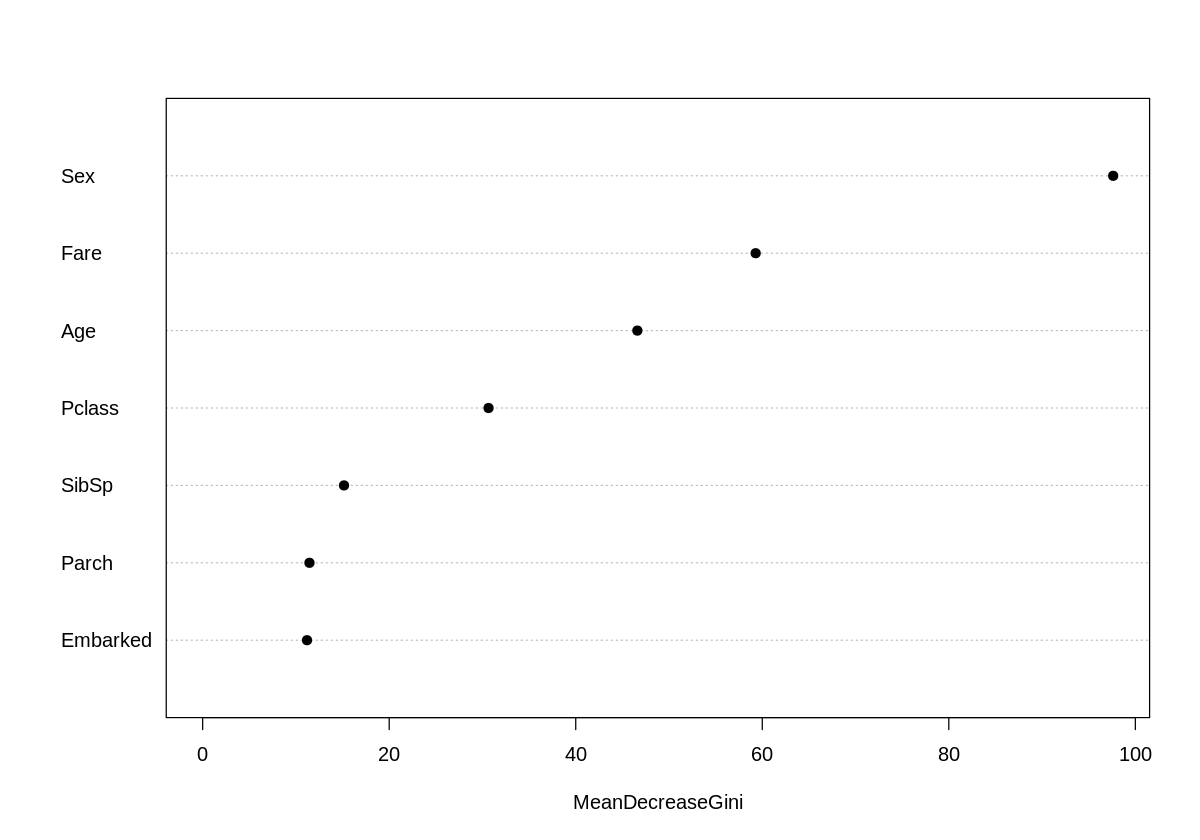

In [46]:
varImpPlot(model_rf, type=2, pch=19, col=1, cex=1, main="")

15. model_rf, model_bagging, 지난 시간에 구한 Decision Tree, 로지스틱회귀, 총 4가지의 confusionMatrix의 정확도 및 성능지표를 확인하세요. Titanic 데이터의 경우 4가지 모델 중
어느 모델을 사용하는 것이 좋을까요? (Hint) caret::confusionMatrix()